In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
import sklearn as skl 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math 
from pandas.plotting import scatter_matrix

In [147]:
gtd_df = pd.read_excel('../data/globalterrorismdb_0522dist.xlsx')

In [148]:
gtd_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [149]:
gtd_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,202012310015,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209702,202012310016,2020,12,31,2020-12-31 00:00:00,0,NaT,228,Yemen,10,...,NaN,"""Al Houthi militia escalated in Hays and targe...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
209703,202012310017,2020,12,31,NaN,0,NaT,75,Germany,8,...,NaN,"""Far-left arson attack suspected on German asy...","""Fire of Bundeswehr vehicles in Leipzig, proba...","""Anarchist Antifa Take Credit for Arson Attack...",START Primary Collection,-9,-9,0,-9,NaN
209704,202012310018,2020,12,31,NaN,0,NaT,4,Afghanistan,6,...,NaN,"""Civil society activist and tribal elder kille...","""Terrorism Digest: 1-2 Jan 21,"" BBC Monitoring...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [150]:
gtd_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [151]:
gtd_df.shape

(209706, 135)

In [152]:
gtd_df.groupby('country_txt').size().nlargest(10)

country_txt
Iraq              27521
Afghanistan       18920
Pakistan          15504
India             13929
Colombia           8915
Philippines        8271
Peru               6111
Yemen              6027
Nigeria            5550
United Kingdom     5513
dtype: int64

In [153]:
gtd_df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    197017
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       179102
Length: 135, dtype: int64

In [154]:
gtd_df2 = gtd_df[['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt',
                'provstate', 'city', 'attacktype1', 'attacktype1_txt', 'targtype1',
                'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt',
                'gname', 'weaptype1', 'weaptype1_txt']]

In [155]:
gtd_df2.shape

(209706, 21)

In [156]:
gtd_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             209706 non-null  int64  
 1   imonth            209706 non-null  int64  
 2   iday              209706 non-null  int64  
 3   country           209706 non-null  int64  
 4   country_txt       209706 non-null  object 
 5   region            209706 non-null  int64  
 6   region_txt        209706 non-null  object 
 7   provstate         209706 non-null  object 
 8   city              209280 non-null  object 
 9   attacktype1       209706 non-null  int64  
 10  attacktype1_txt   209706 non-null  object 
 11  targtype1         209706 non-null  int64  
 12  targtype1_txt     209706 non-null  object 
 13  targsubtype1      197867 non-null  float64
 14  targsubtype1_txt  197867 non-null  object 
 15  target1           209071 non-null  object 
 16  natlty1           20

In [157]:
gtd_df2

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,attacktype1,...,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,weaptype1,weaptype1_txt
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,1,...,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,13,Unknown
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,6,...,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,13,Unknown
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,...,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,13,Unknown
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,3,...,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,6,Explosives
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,7,...,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,8,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209701,2020,12,31,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Sabaa,3,...,14,Private Citizens & Property,76.0,House/Apartment/Residence,Residences,228.0,Yemen,Houthi extremists (Ansar Allah),6,Explosives
209702,2020,12,31,228,Yemen,10,Middle East & North Africa,Al Hudaydah,Beit Maghari,3,...,14,Private Citizens & Property,76.0,House/Apartment/Residence,Residences,228.0,Yemen,Houthi extremists (Ansar Allah),6,Explosives
209703,2020,12,31,75,Germany,8,Western Europe,Lower Saxony,Leipzig,7,...,4,Military,35.0,Military Transportation/Vehicle (excluding con...,Wolf-Class Vehicles,75.0,Germany,Left-wing extremists,8,Incendiary
209704,2020,12,31,4,Afghanistan,6,South Asia,Kabul,Kabul,2,...,14,Private Citizens & Property,83.0,Protester,Activist: Abdi Jahid,4.0,Afghanistan,Unknown,5,Firearms


In [158]:
gtd_df2['targsubtype1'].fillna(0.0, inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1853/1082826831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['targsubtype1'].fillna(0.0, inplace=True)


In [159]:
gtd_df2['city'].fillna('Unknown', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1853/1948848045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['city'].fillna('Unknown', inplace=True)


In [160]:
gtd_df2['targsubtype1_txt'].fillna('Unknown', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1853/1050358810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['targsubtype1_txt'].fillna('Unknown', inplace=True)


In [161]:
gtd_df2['target1'].fillna('Unknown', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1853/2086078965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['target1'].fillna('Unknown', inplace=True)


In [162]:
gtd_df2['natlty1_txt'].fillna('Unidentified', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1853/2218764372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['natlty1_txt'].fillna('Unidentified', inplace=True)


In [163]:
gtd_df2['natlty1'].fillna(0.0, inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1853/2388825530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['natlty1'].fillna(0.0, inplace=True)


In [164]:
gtd_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             209706 non-null  int64  
 1   imonth            209706 non-null  int64  
 2   iday              209706 non-null  int64  
 3   country           209706 non-null  int64  
 4   country_txt       209706 non-null  object 
 5   region            209706 non-null  int64  
 6   region_txt        209706 non-null  object 
 7   provstate         209706 non-null  object 
 8   city              209706 non-null  object 
 9   attacktype1       209706 non-null  int64  
 10  attacktype1_txt   209706 non-null  object 
 11  targtype1         209706 non-null  int64  
 12  targtype1_txt     209706 non-null  object 
 13  targsubtype1      209706 non-null  float64
 14  targsubtype1_txt  209706 non-null  object 
 15  target1           209706 non-null  object 
 16  natlty1           20

In [165]:
gtd_df2.shape

(209706, 21)

array([[<Axes: xlabel='iyear', ylabel='iyear'>,
        <Axes: xlabel='imonth', ylabel='iyear'>,
        <Axes: xlabel='iday', ylabel='iyear'>,
        <Axes: xlabel='country', ylabel='iyear'>,
        <Axes: xlabel='region', ylabel='iyear'>,
        <Axes: xlabel='attacktype1', ylabel='iyear'>,
        <Axes: xlabel='targtype1', ylabel='iyear'>,
        <Axes: xlabel='targsubtype1', ylabel='iyear'>,
        <Axes: xlabel='natlty1', ylabel='iyear'>,
        <Axes: xlabel='weaptype1', ylabel='iyear'>],
       [<Axes: xlabel='iyear', ylabel='imonth'>,
        <Axes: xlabel='imonth', ylabel='imonth'>,
        <Axes: xlabel='iday', ylabel='imonth'>,
        <Axes: xlabel='country', ylabel='imonth'>,
        <Axes: xlabel='region', ylabel='imonth'>,
        <Axes: xlabel='attacktype1', ylabel='imonth'>,
        <Axes: xlabel='targtype1', ylabel='imonth'>,
        <Axes: xlabel='targsubtype1', ylabel='imonth'>,
        <Axes: xlabel='natlty1', ylabel='imonth'>,
        <Axes: xlabel='weaptyp

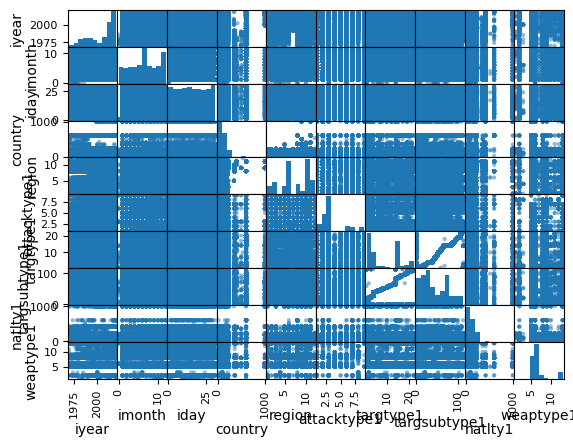

In [166]:
scatter_matrix(gtd_df2)

In [167]:
gtd_df3 = gtd_df2.drop(gtd_df2.select_dtypes(include=['object']), axis=1)


In [168]:
gtd_df3

,iyear,imonth,iday,country,region,attacktype1,targtype1,targsubtype1,natlty1,weaptype1
0,1970,7,2,58,2,1,14,68.0,58.0,13
1,1970,0,0,130,1,6,7,45.0,21.0,13
2,1970,1,0,160,5,1,10,54.0,217.0,13
3,1970,1,0,78,8,3,7,46.0,217.0,6
4,1970,1,0,101,4,7,7,46.0,217.0,8
...,...,...,...,...,...,...,...,...,...,...
209701,2020,12,31,228,10,3,14,76.0,228.0,6
209702,2020,12,31,228,10,3,14,76.0,228.0,6
209703,2020,12,31,75,8,7,4,35.0,75.0,8
209704,2020,12,31,4,6,2,14,83.0,4.0,5


array([[<Axes: xlabel='iyear', ylabel='iyear'>,
        <Axes: xlabel='imonth', ylabel='iyear'>,
        <Axes: xlabel='iday', ylabel='iyear'>,
        <Axes: xlabel='country', ylabel='iyear'>,
        <Axes: xlabel='region', ylabel='iyear'>,
        <Axes: xlabel='attacktype1', ylabel='iyear'>,
        <Axes: xlabel='targtype1', ylabel='iyear'>,
        <Axes: xlabel='targsubtype1', ylabel='iyear'>,
        <Axes: xlabel='natlty1', ylabel='iyear'>,
        <Axes: xlabel='weaptype1', ylabel='iyear'>],
       [<Axes: xlabel='iyear', ylabel='imonth'>,
        <Axes: xlabel='imonth', ylabel='imonth'>,
        <Axes: xlabel='iday', ylabel='imonth'>,
        <Axes: xlabel='country', ylabel='imonth'>,
        <Axes: xlabel='region', ylabel='imonth'>,
        <Axes: xlabel='attacktype1', ylabel='imonth'>,
        <Axes: xlabel='targtype1', ylabel='imonth'>,
        <Axes: xlabel='targsubtype1', ylabel='imonth'>,
        <Axes: xlabel='natlty1', ylabel='imonth'>,
        <Axes: xlabel='weaptyp

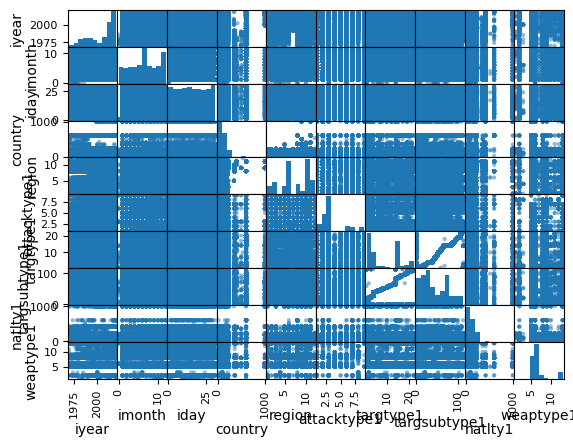

In [169]:
scatter_matrix(gtd_df3)

In [170]:
count_by_year = gtd_df3['iyear'].groupby(gtd_df3['iyear']).count()

(array([14233., 19846.,   847., 14498., 54725.,   580., 17328.,  5326.,
        58252., 24071.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

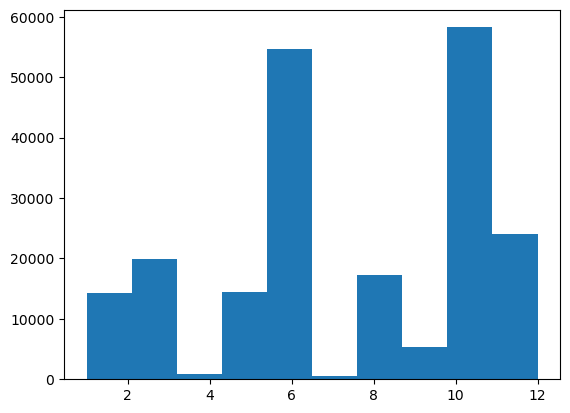

In [175]:
plt.hist(gtd_df2['region'])

Text(0.5, 1.0, 'Occurrences by Year')

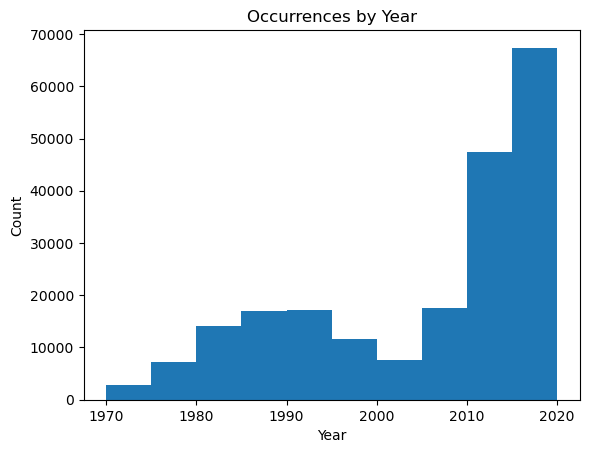

In [171]:
plt.hist(gtd_df3['iyear'], bins=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Occurrences by Year')